In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress

# Read in our csv file created and drop an extra index column.
merged_df = pd.read_csv("output_csv/covid_vaccine_gdp_merged.csv")
merged_df = merged_df.drop(columns={"Unnamed: 0"})
merged_df.head()

Location        Date  Total_Confirmed  Total_Deaths  Daily_Confirmed  \
0  Afghanistan  2021-04-22            58312          2561               98   
1  Afghanistan  2021-04-21            58214          2557              177   
2  Afghanistan  2021-04-20            58037          2549              139   
3  Afghanistan  2021-04-19            57898          2546              105   
4  Afghanistan  2021-04-18            57793          2539               72   

   Daily_Deaths  daily_vaccinations  daily_vaccinations_per_million  gdppc  
0             4                8000                             206  507.1  
1             8                8000                             206  507.1  
2             3                8000                             206  507.1  
3             7                8000                             206  507.1  
4             0                8000                             206  507.1

In [2]:
unique_country = merged_df["Location"].unique()
country_list = []

for country in unique_country:
    country_list.append(country)

# Count of countries in list
print(f"Original count of unique countries: {len(country_list)}.")
#country_list

# A list of countries that we removed from our analysis
bad_countries = ["Algeria", "Cameroon", "Samoa"]
# Count of bad countries
print(f"Count of bad countries:  {len(bad_countries)}.")

# Nested for loop to check country_list against bad_countries and removing any matches.
for bad in bad_countries:
    for index, country in enumerate(country_list):
        if country == bad:
            del country_list[index]

# Count of remaining list.  Should be first print minus second print.            
print(f"Updated count after removed countries: {len(country_list)}.")       

Original count of unique countries: 159.
Count of bad countries:  3.
Updated count after removed countries: 156.


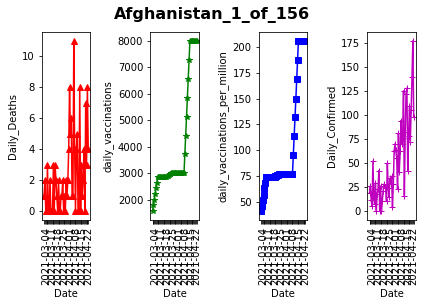

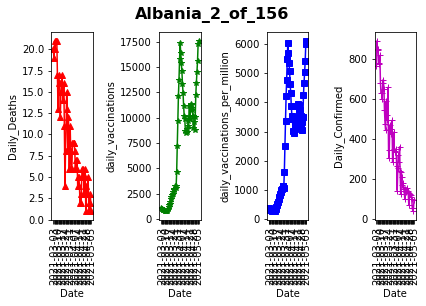

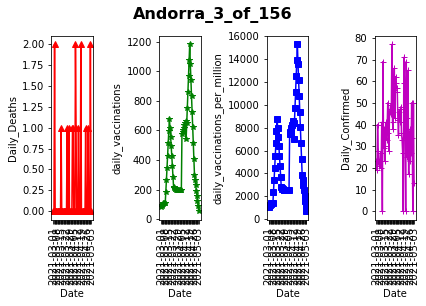

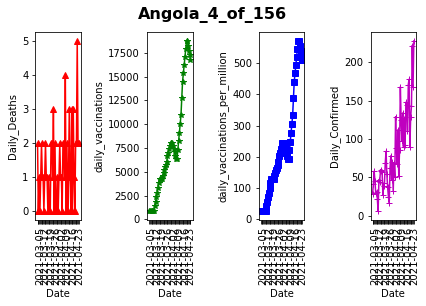

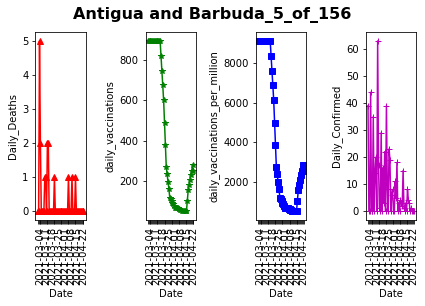

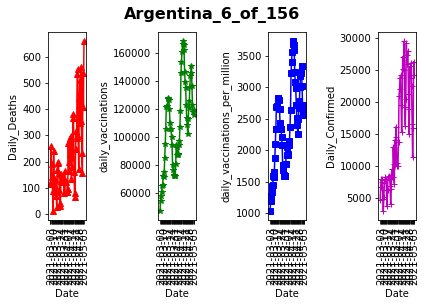

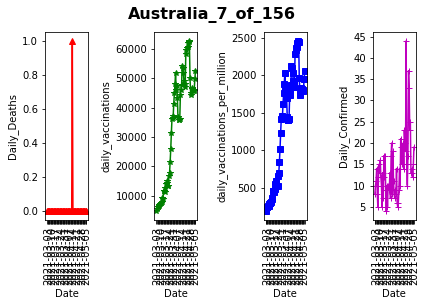

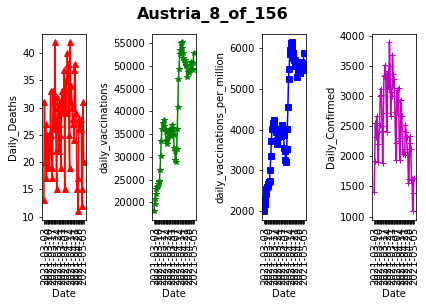

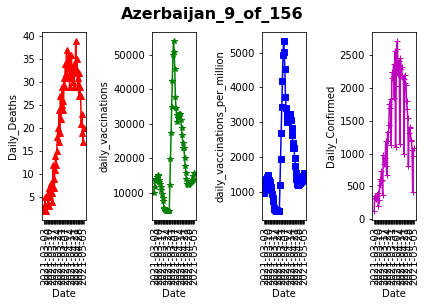

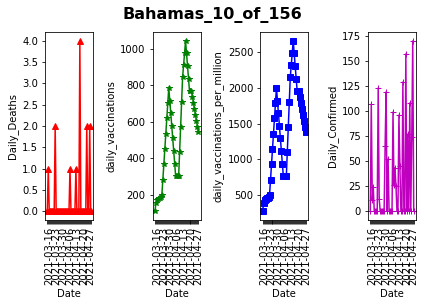

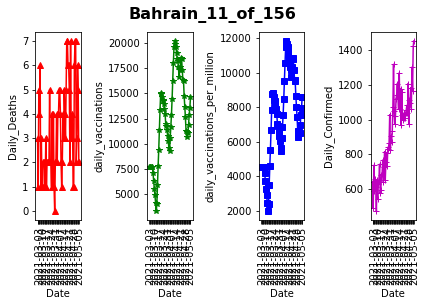

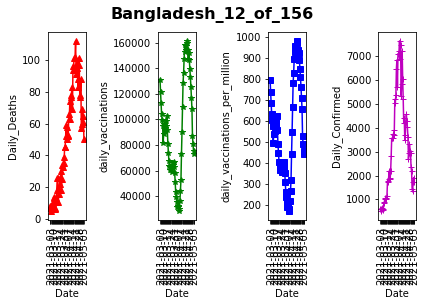

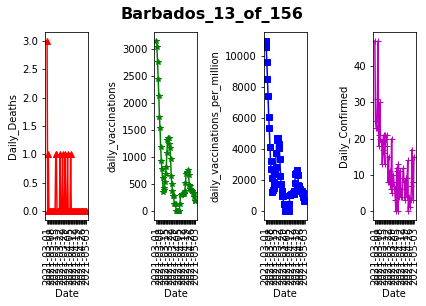

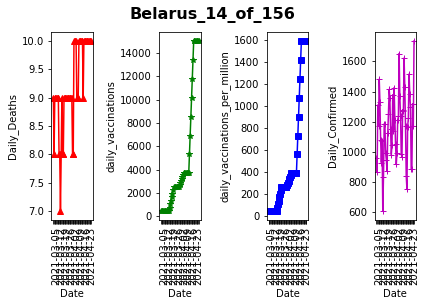

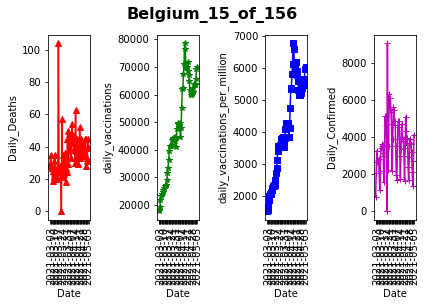

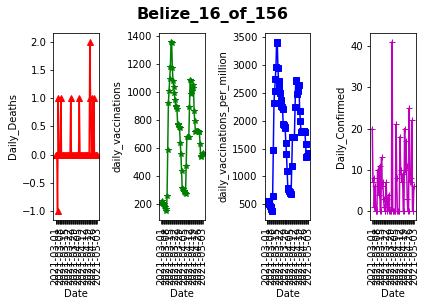

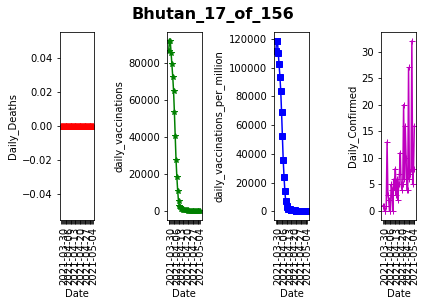

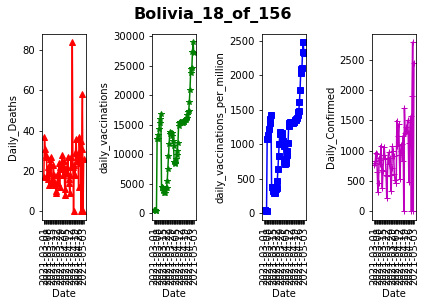

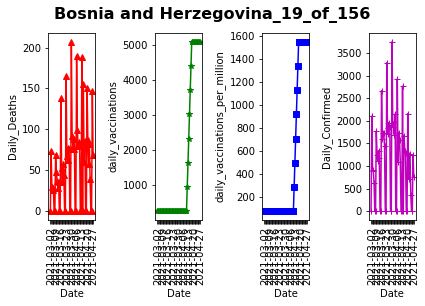

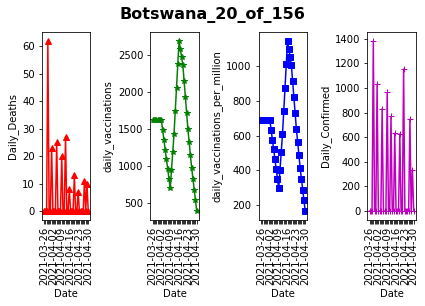

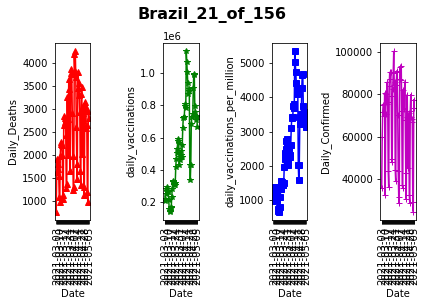

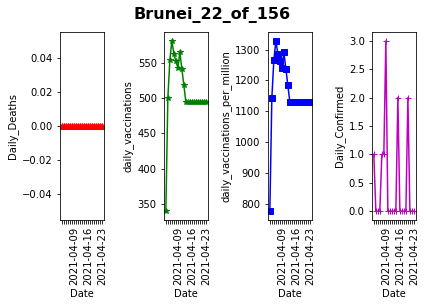

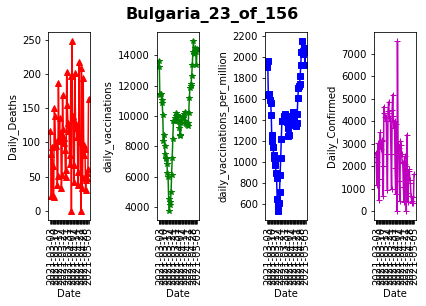

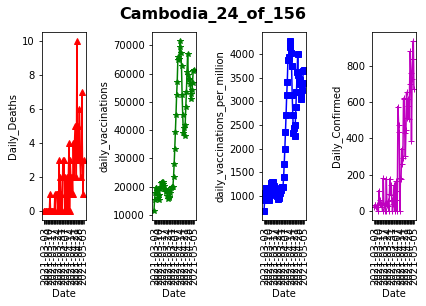

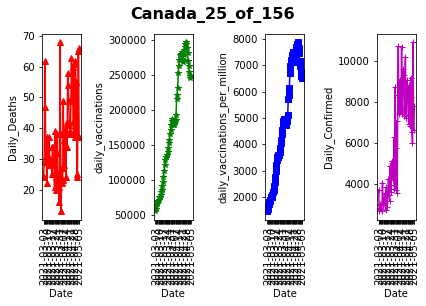

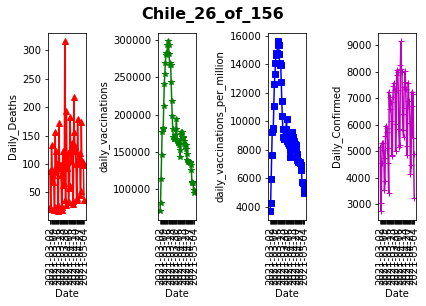

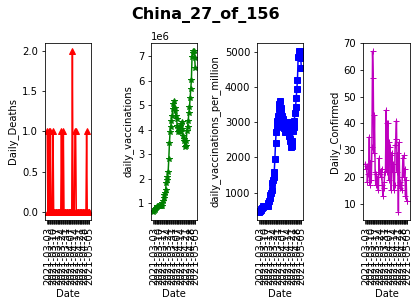

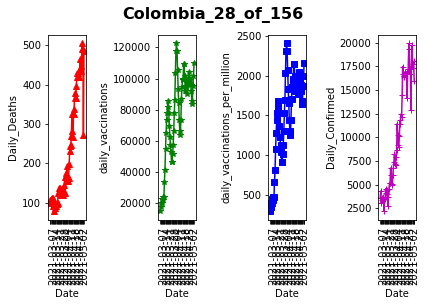

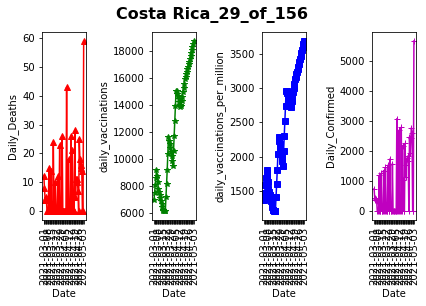

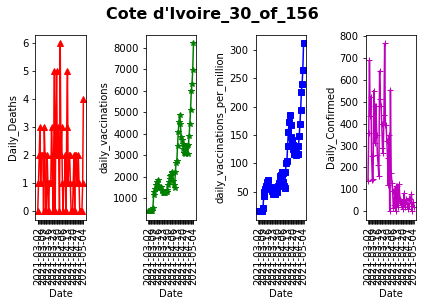

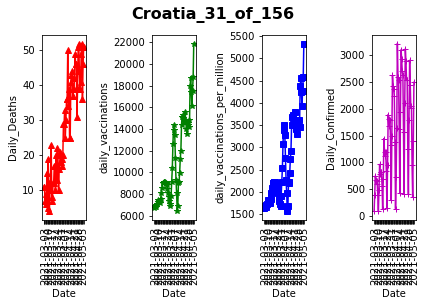

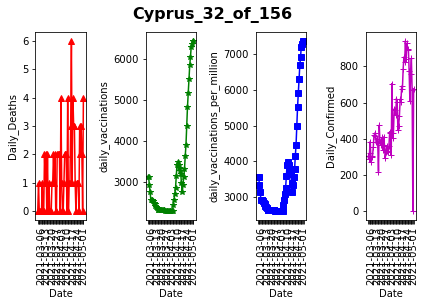

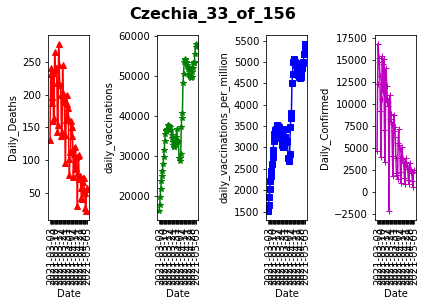

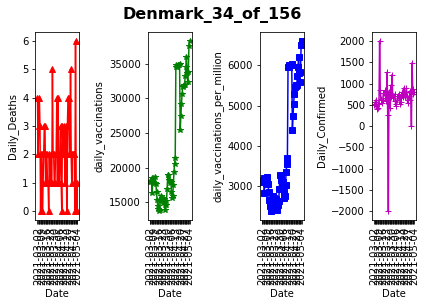

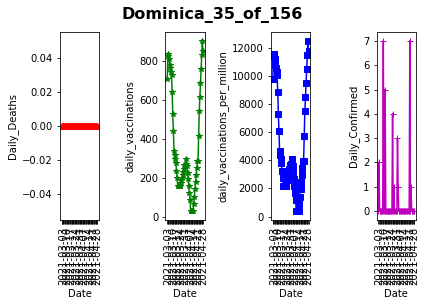

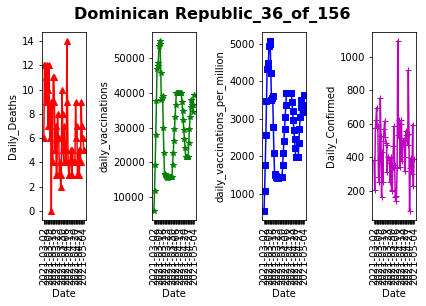

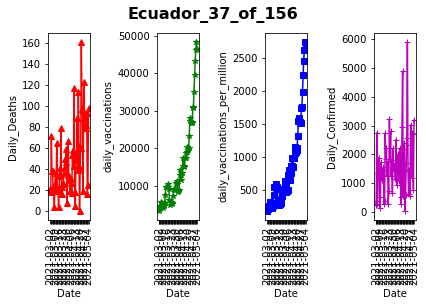

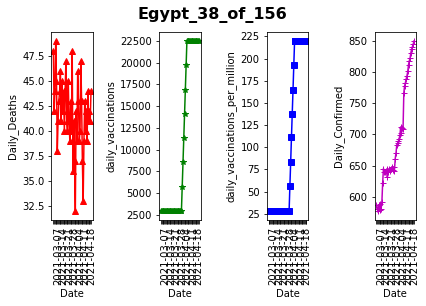

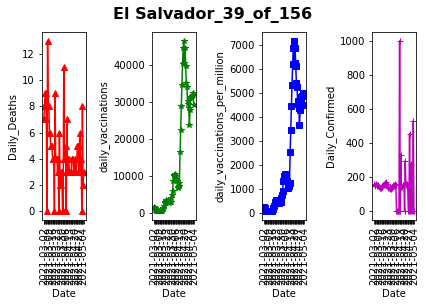

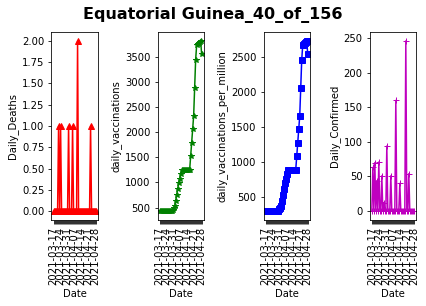

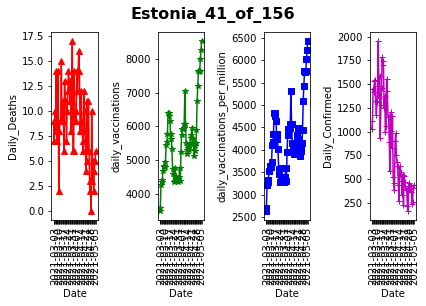

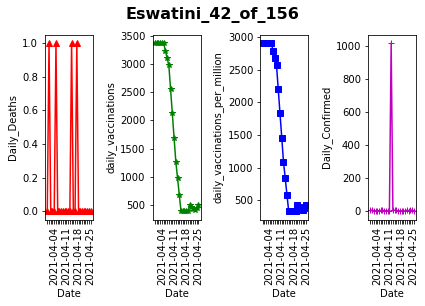

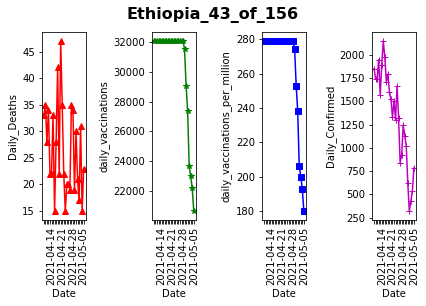

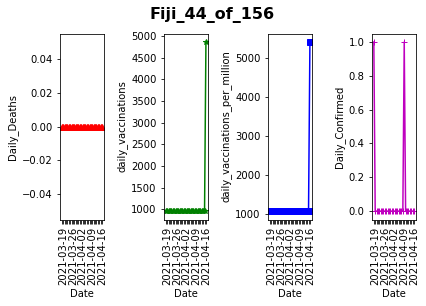

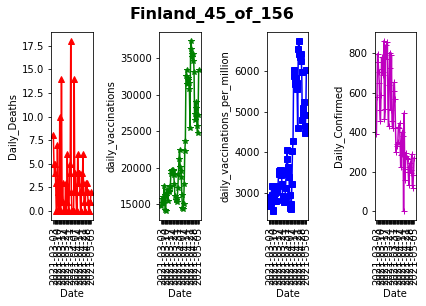

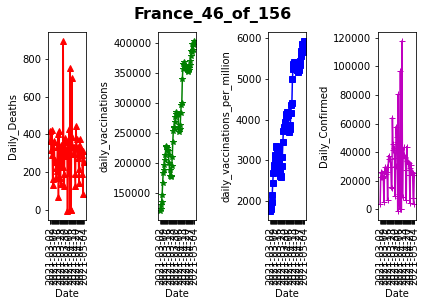

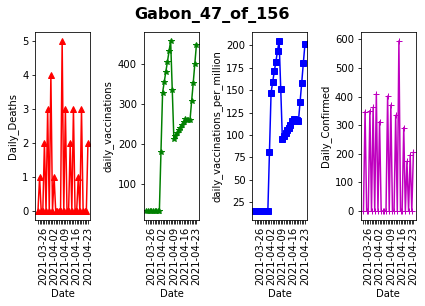

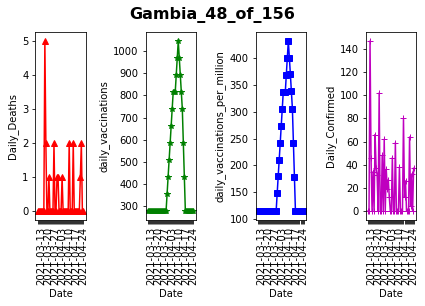

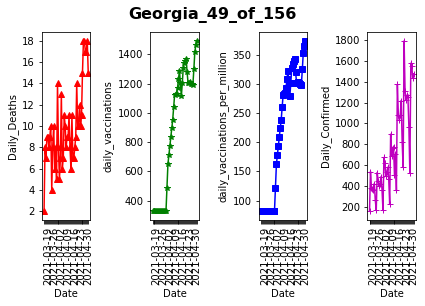

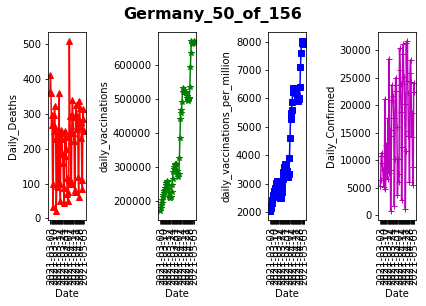

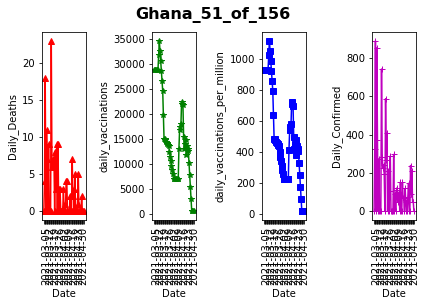

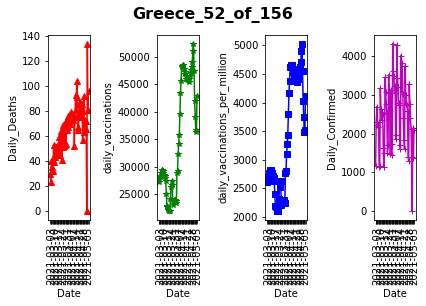

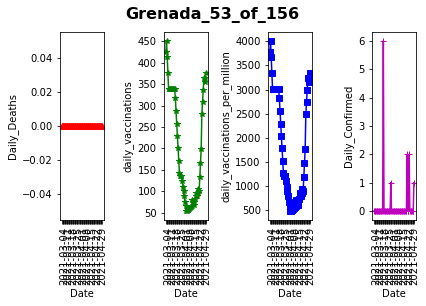

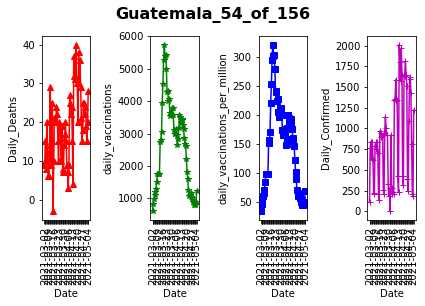

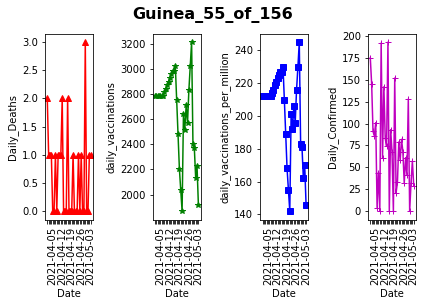

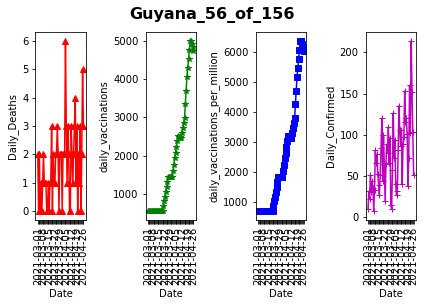

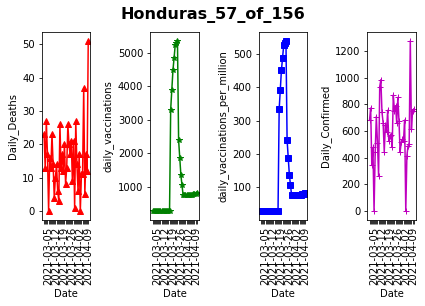

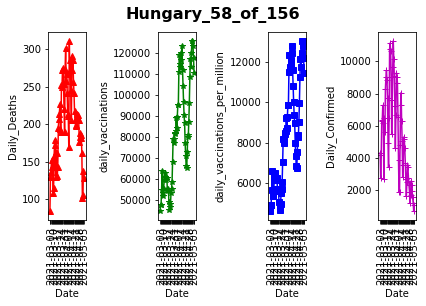

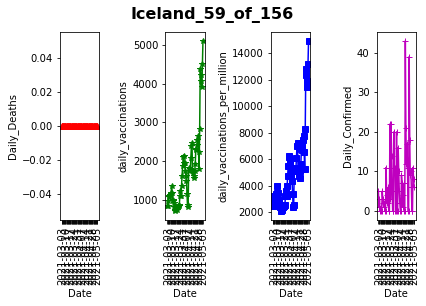

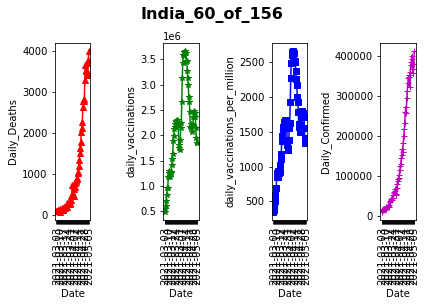

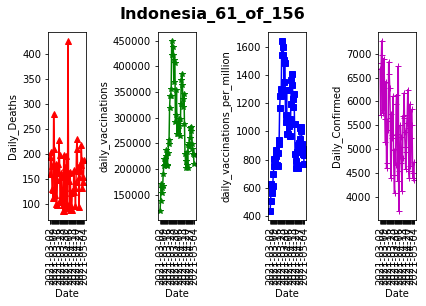

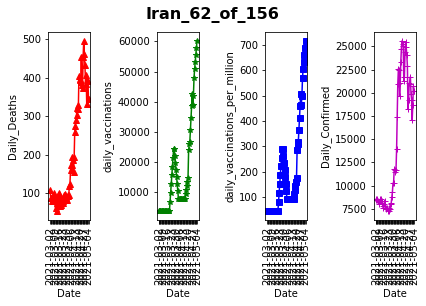

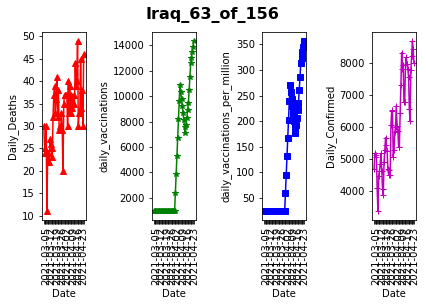

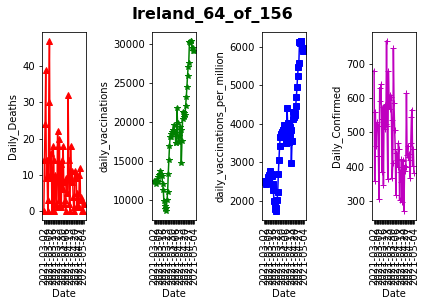

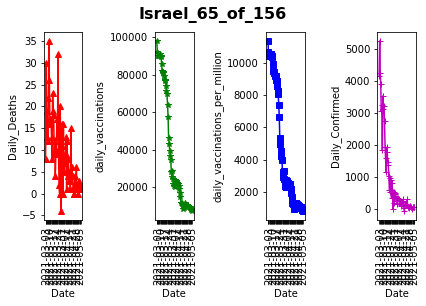

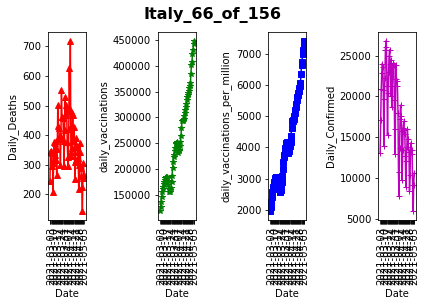

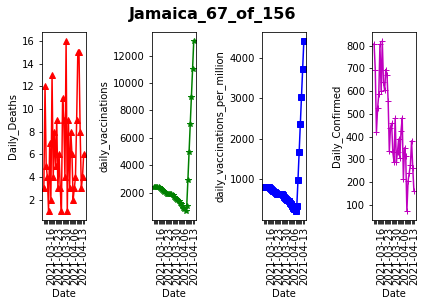

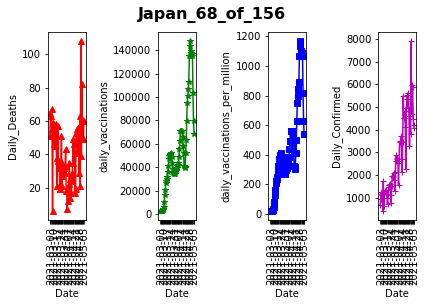

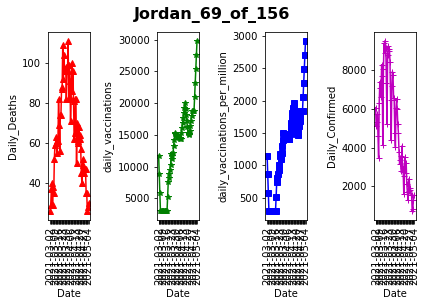

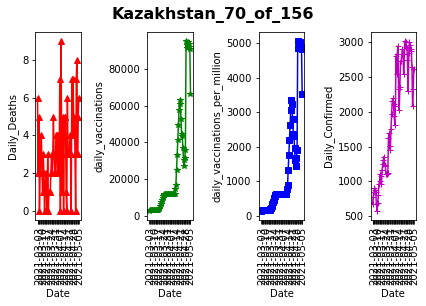

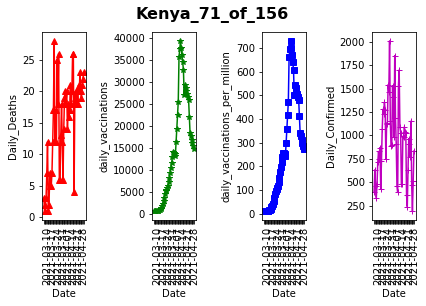

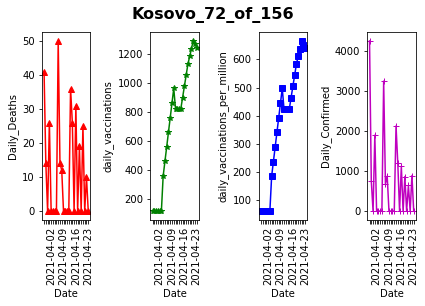

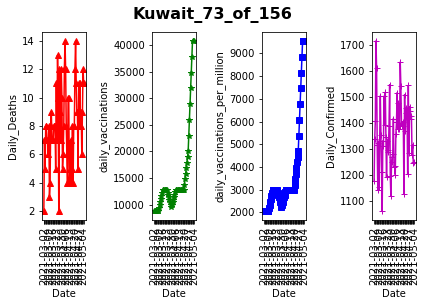

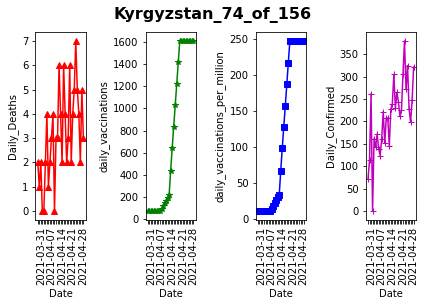

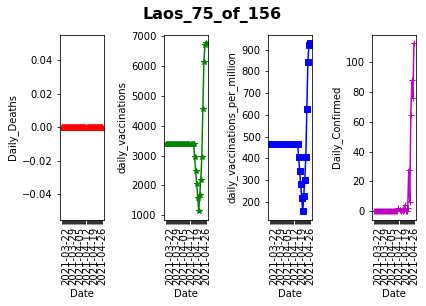

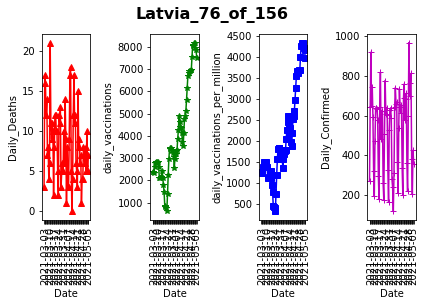

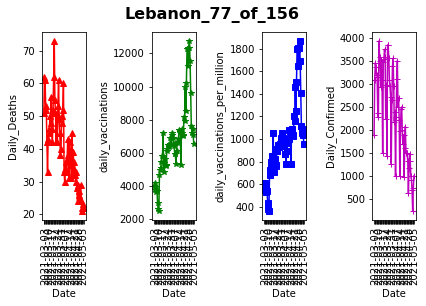

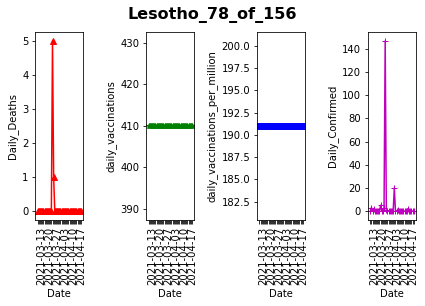

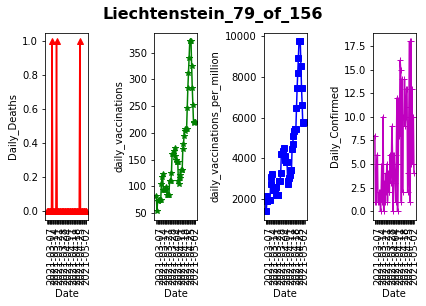

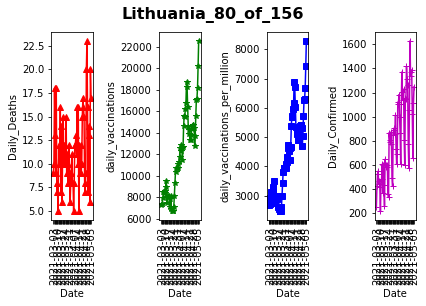

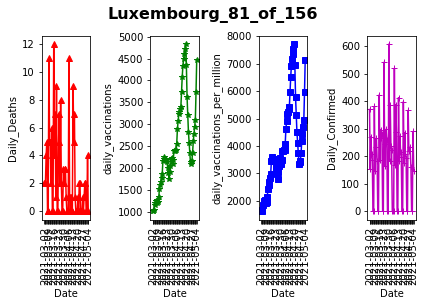

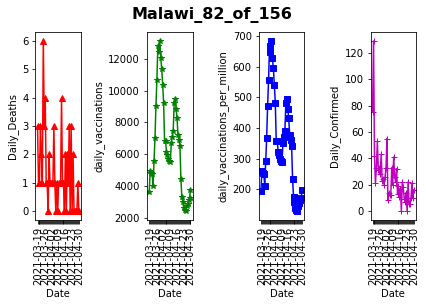

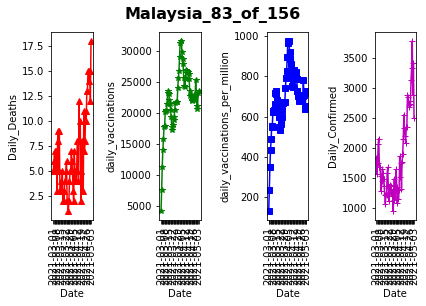

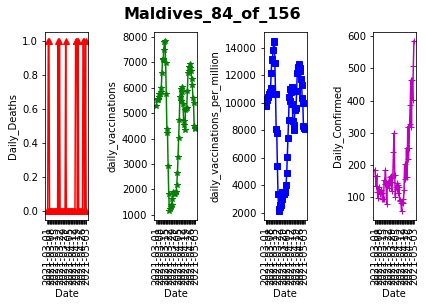

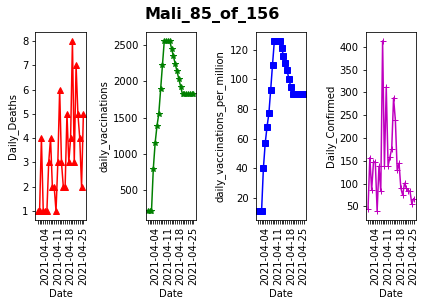

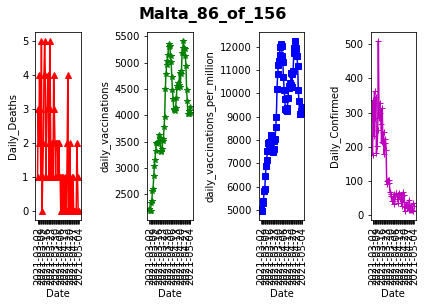

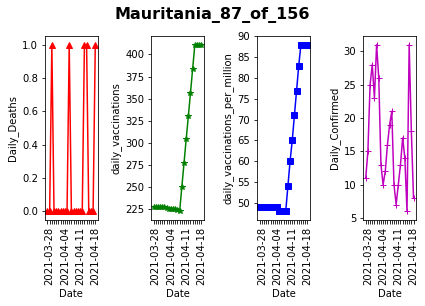

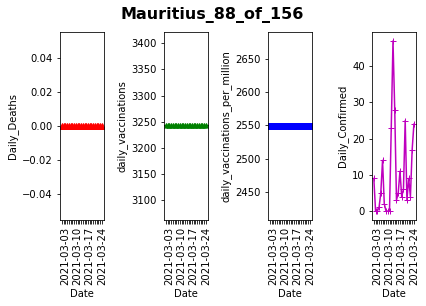

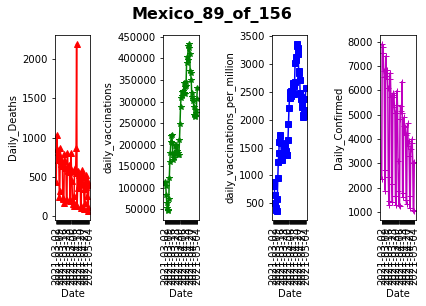

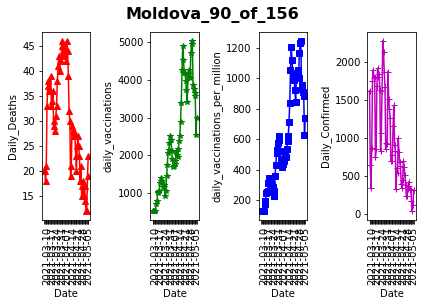

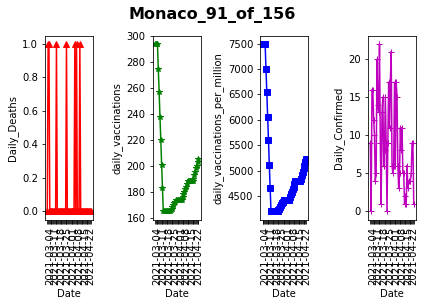

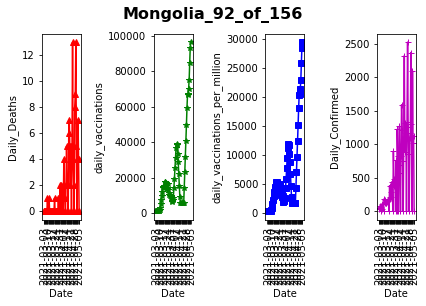

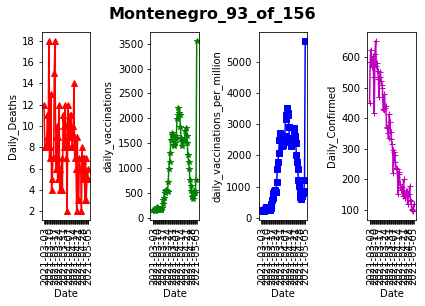

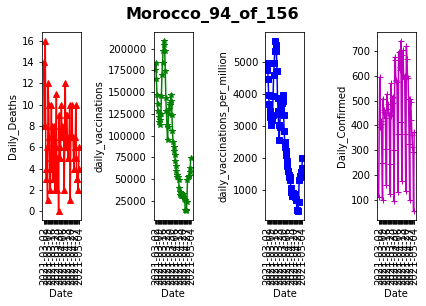

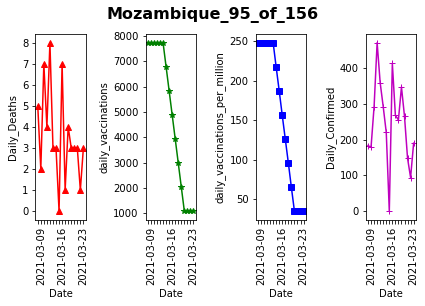

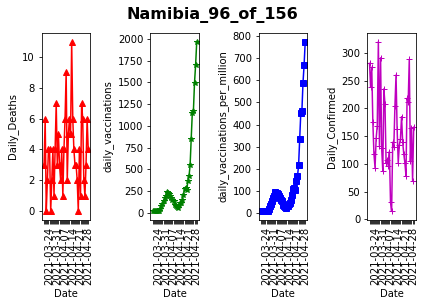

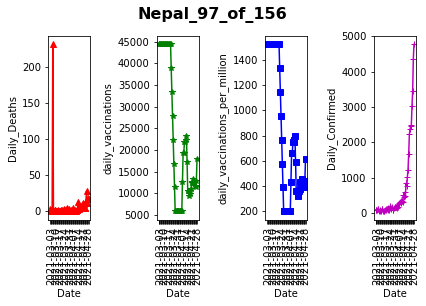

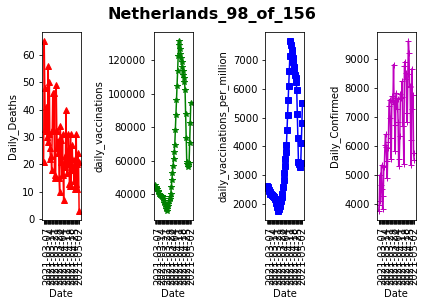

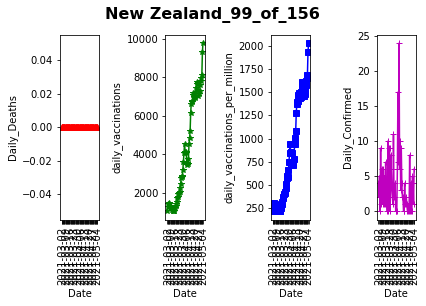

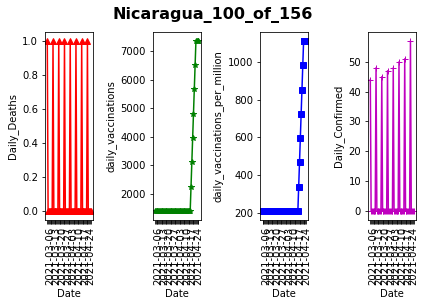

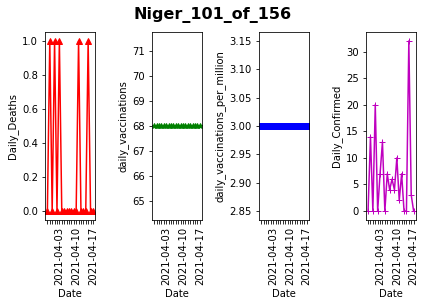

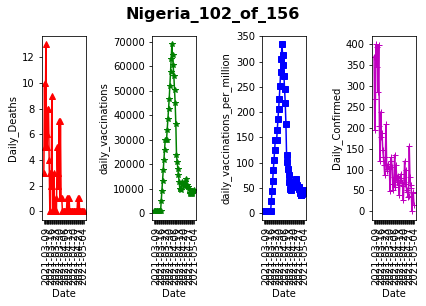

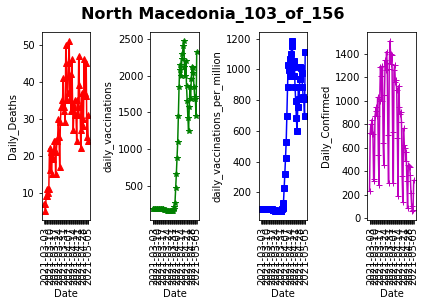

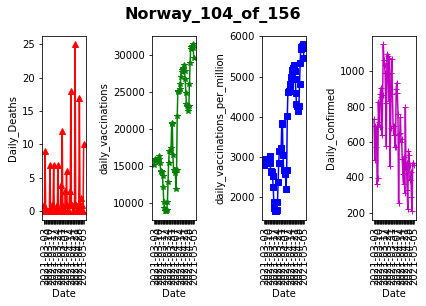

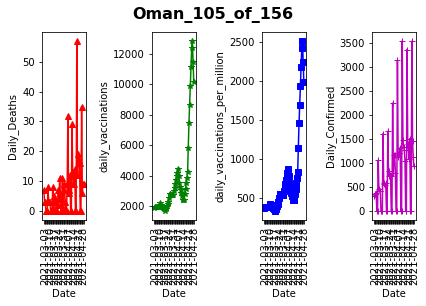

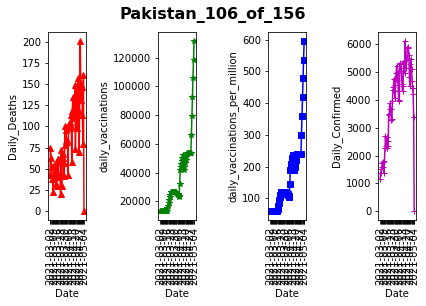

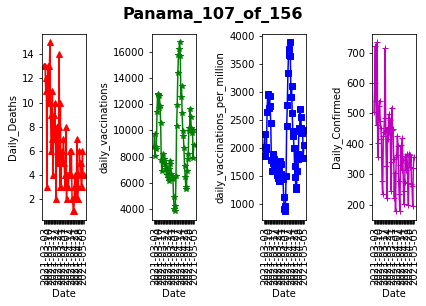

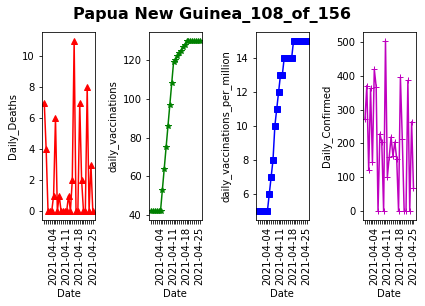

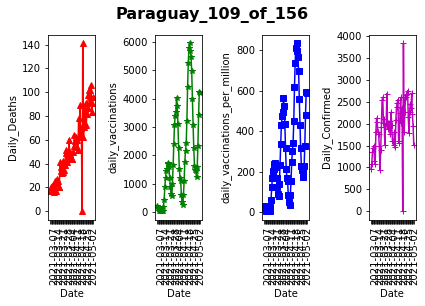

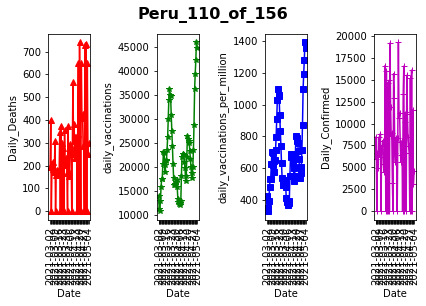

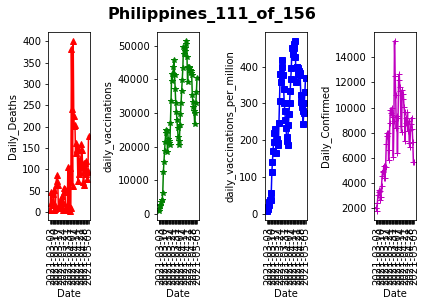

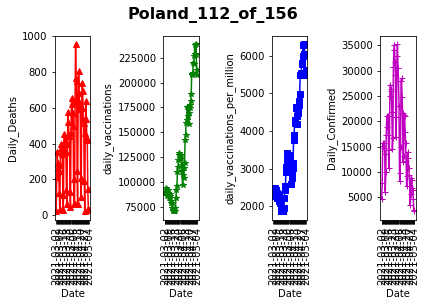

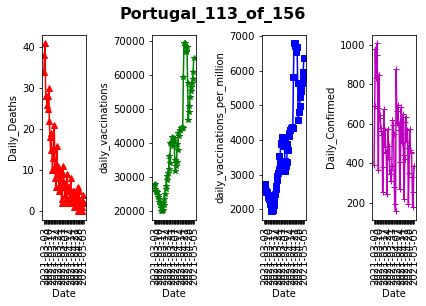

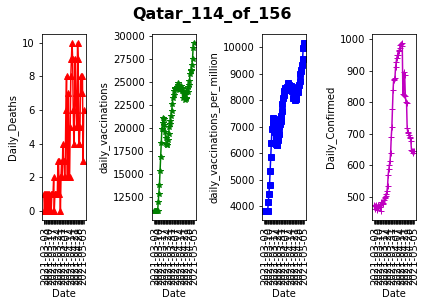

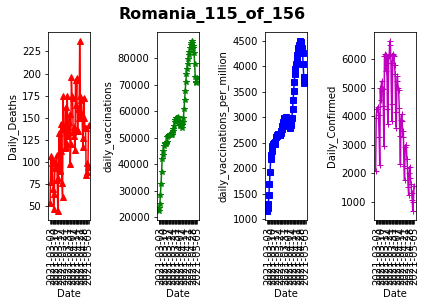

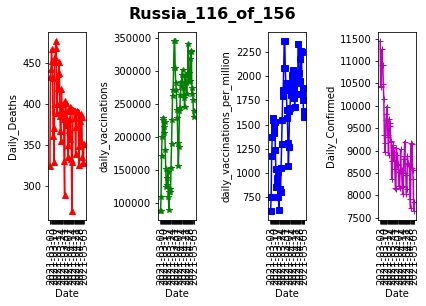

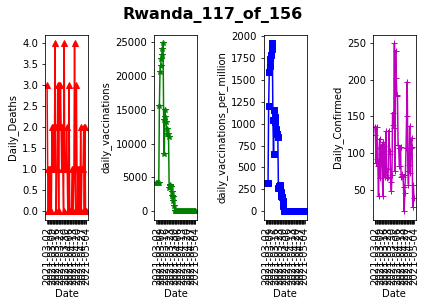

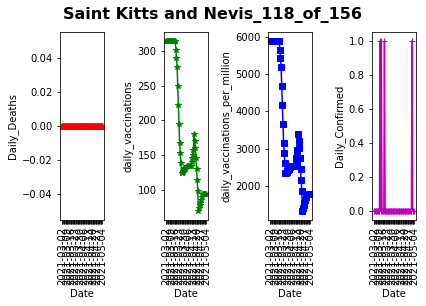

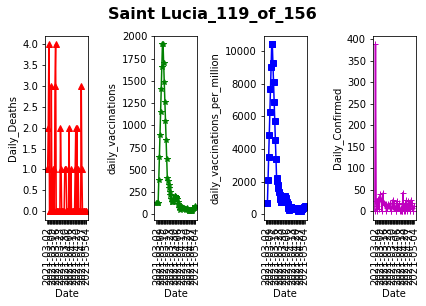

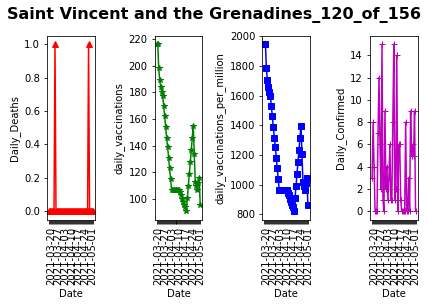

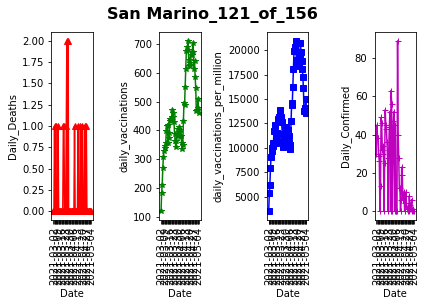

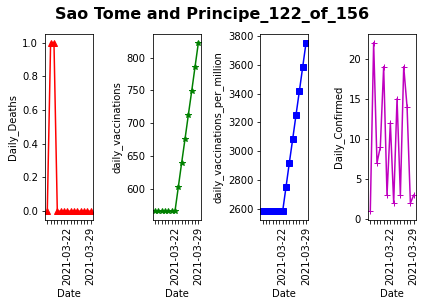

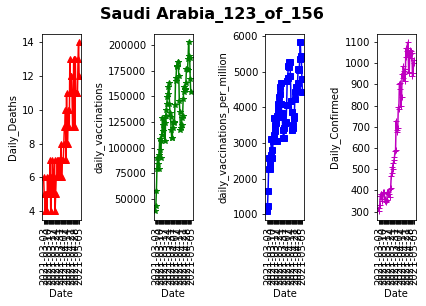

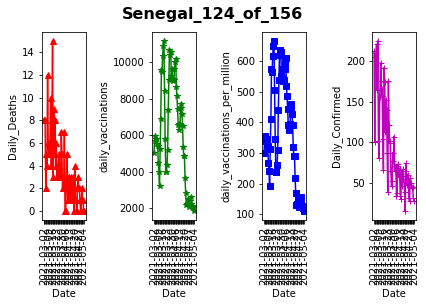

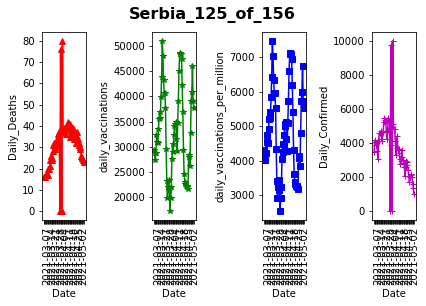

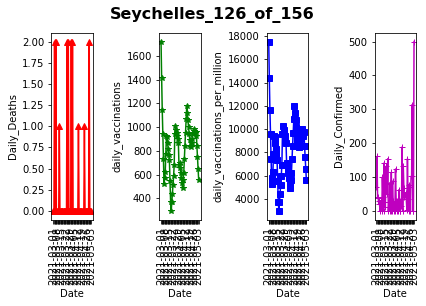

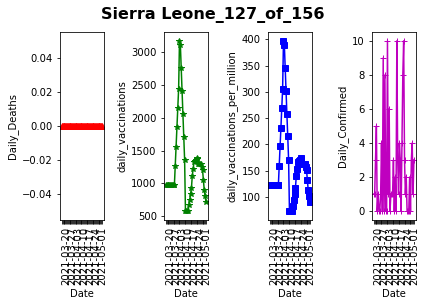

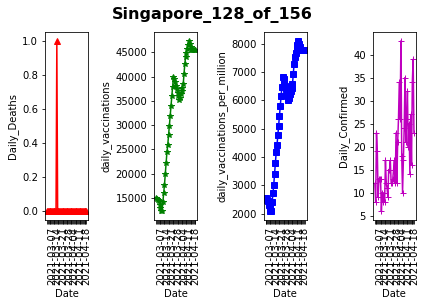

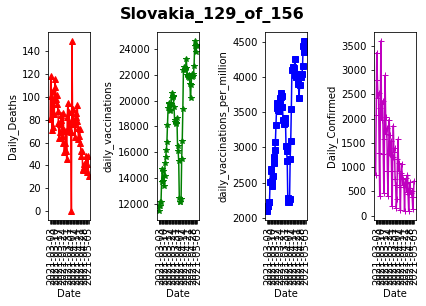

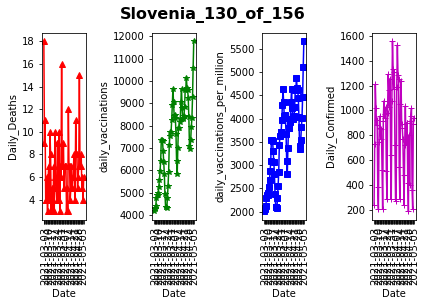

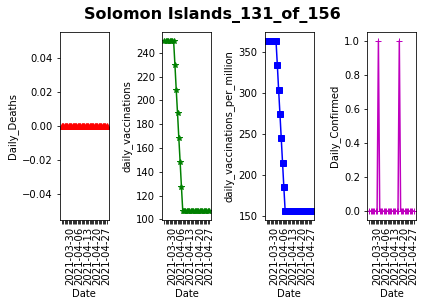

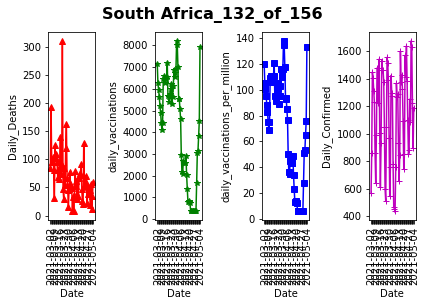

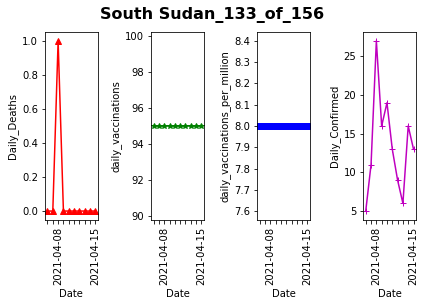

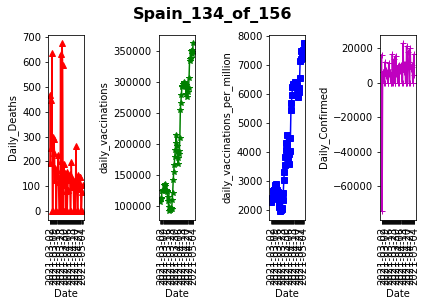

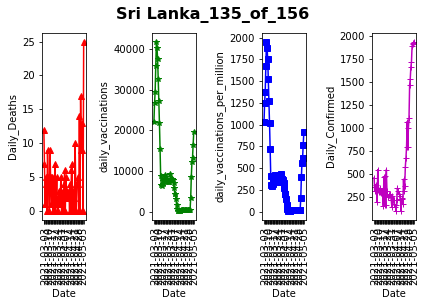

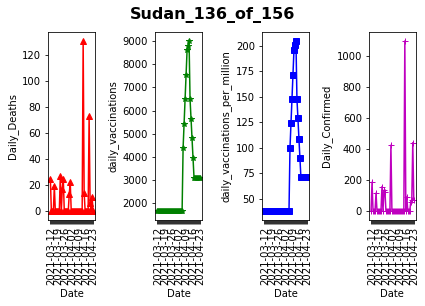

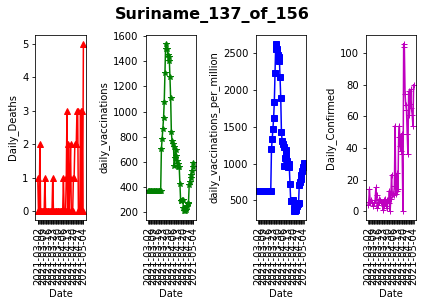

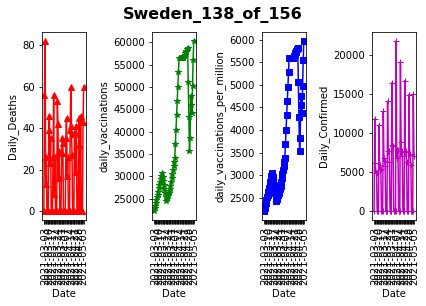

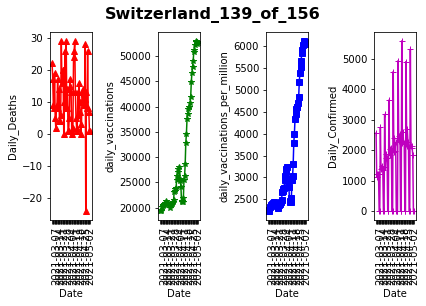

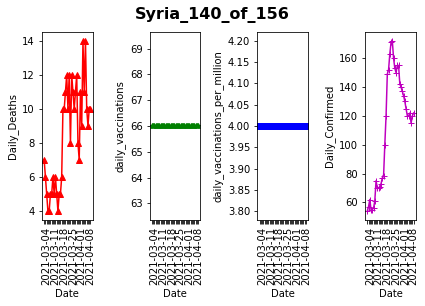

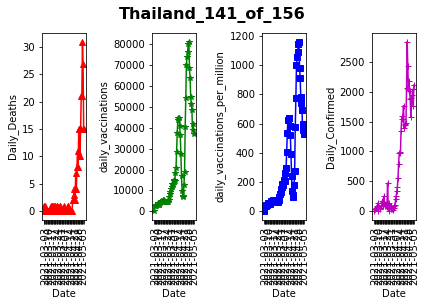

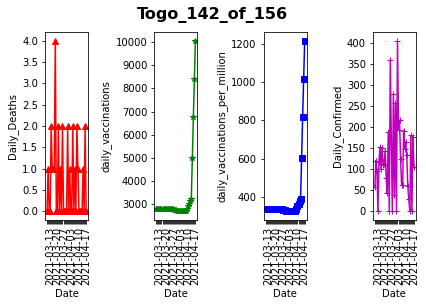

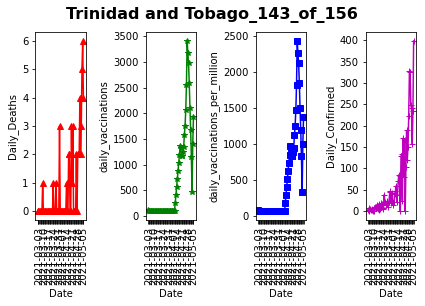

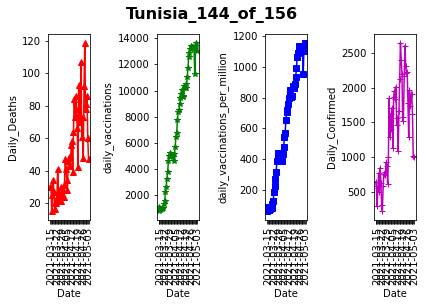

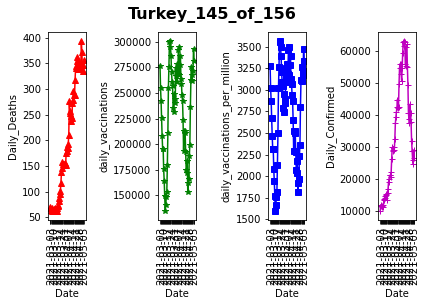

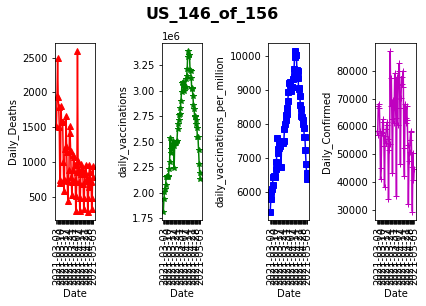

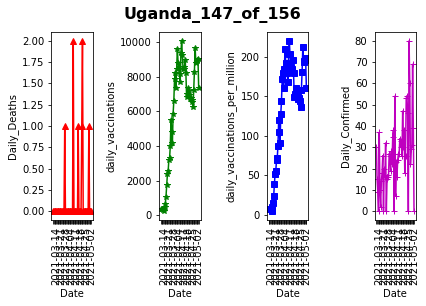

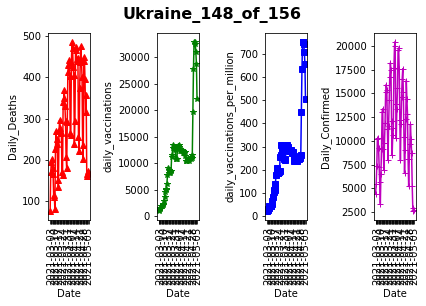

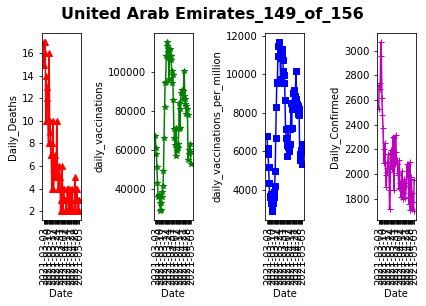

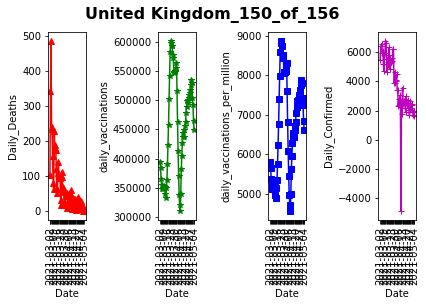

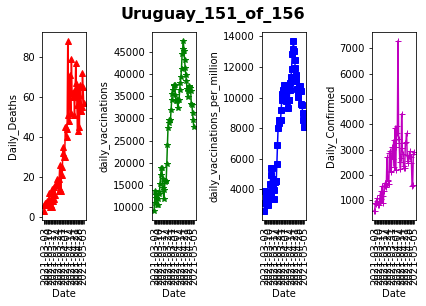

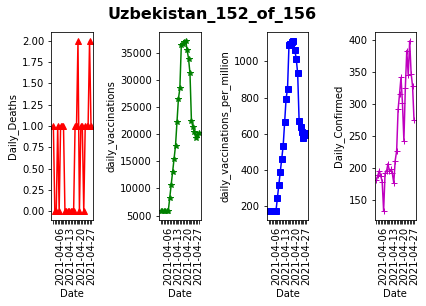

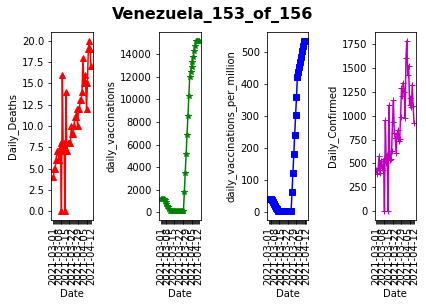

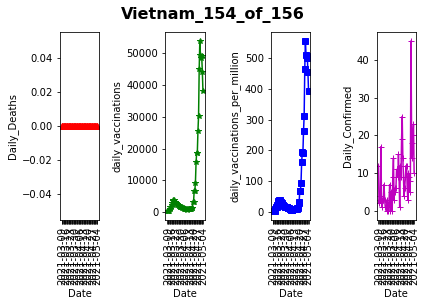

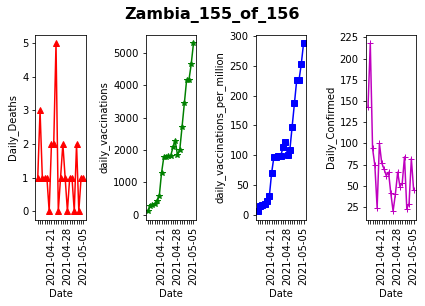

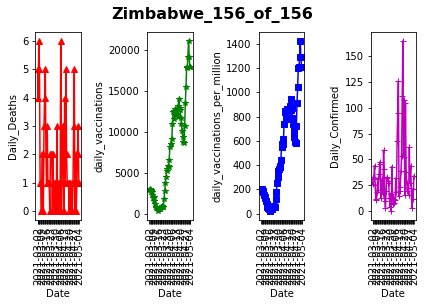

In [4]:
# Name of folder that images will save to.
folder_name = "lineplot_images"
# Check if local machine has this folder created already in location of notebook.
# If it does not, it creates it.
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Looping through each country in country_list
for index, country in enumerate(country_list):
    
    # For each country we make a new dataframe with location equal to current country
    # and filter date to be March to present.
    country_df = merged_df.loc[(merged_df["Location"] == country) & (merged_df["Date"] > "2021-02-31"), :]
    
    # Assigning the x axis to Date in our newly created country_df DataFrame
    x_axis = country_df["Date"]
    # List of the different y axis we will have.  In other words, the number of graphs we will plot per country
    y_columns = ["Daily_Deaths", "daily_vaccinations", "daily_vaccinations_per_million", "Daily_Confirmed"]
    
    # An emptry string and then a for loop to append only every 7th date (day) to our list.
    # This will be used for our tick label.
    new_ticks = []
    for i, date in enumerate(x_axis):
        if i%7 == 0:
            new_ticks.append(date)
        else:
            new_ticks.append('')
    
    # Variables to be printed as the figure suptitle and the name of the image saved
    figname = country + "_" + str((index + 1)) + "_of_" + str(len(country_list))

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=len(y_columns), sharex=False, sharey=False)
    fig.suptitle(figname, fontsize=16, fontweight="bold", y=1.05)

    # Sub plot of Date vs index 0 in y_columns list
    ax1.plot(x_axis, country_df[y_columns[0]], marker="^", color="r")
    ax1.invert_xaxis()
    ax1.set_xticklabels(new_ticks, rotation=90)
    ax1.set_xlabel("Date")
    ax1.set_ylabel(y_columns[0])
    
    # Sub plot of Date vs index 1 in y_columns list
    ax2.plot(x_axis, country_df[y_columns[1]], marker="*", color="g")
    ax2.invert_xaxis()
    ax2.set_xticklabels(new_ticks, rotation=90)
    ax2.set_xlabel("Date")
    ax2.set_ylabel(y_columns[1])

    # Sub plot of Date vs index 2 in y_columns list
    ax3.plot(x_axis, country_df[y_columns[2]], marker="s", color="b")
    ax3.invert_xaxis()
    ax3.set_xticklabels(new_ticks, rotation=90)
    ax3.set_xlabel("Date")
    ax3.set_ylabel(y_columns[2])
    
    # Sub plot of Date vs index 2 in y_columns list
    ax4.plot(x_axis, country_df[y_columns[3]], marker="+", color="m")
    ax4.invert_xaxis()
    ax4.set_xticklabels(new_ticks, rotation=90)
    ax4.set_xlabel("Date")
    ax4.set_ylabel(y_columns[3])
    
    plt.tight_layout()
    plt.savefig(folder_name + "/" + figname + ".png", bbox_inches='tight')
    plt.show()

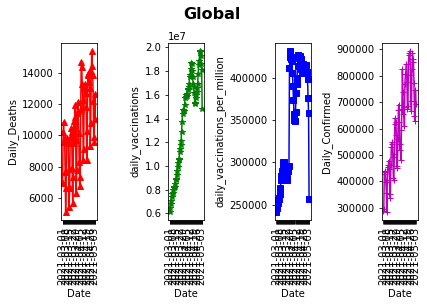

In [8]:
# Name of folder that images will save to.
folder_name = "lineplot_images"
# Check if local machine has this folder created already in location of notebook.
# If it does not, it creates it.
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

global_df = merged_df.groupby(["Date"], sort=True).sum()
global_df = global_df.loc[(global_df.index > "2021-02-31"), :]
#global_df

x_axis = global_df.index
y_columns = ["Daily_Deaths", "daily_vaccinations", "daily_vaccinations_per_million", "Daily_Confirmed"]

# An emptry string and then a for loop to append only every 7th date (day) to our list.
# This will be used for our tick label.
new_ticks = []
for i, date in enumerate(x_axis):
    if i%7 == 0:
        new_ticks.append(date)
    else:
        new_ticks.append('')
    
# Variables to be printed as the figure suptitle and the name of the image saved
figname = "Global"

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=len(y_columns), sharex=False, sharey=False)
fig.suptitle(figname, fontsize=16, fontweight="bold", y=1.05)

# Sub plot of Date vs index 0 in y_columns list
ax1.plot(x_axis, global_df[y_columns[0]], marker="^", color="r")
#ax1.invert_xaxis()
ax1.set_xticklabels(new_ticks, rotation=90)
ax1.set_xlabel("Date")
ax1.set_ylabel(y_columns[0])
    
# Sub plot of Date vs index 1 in y_columns list
ax2.plot(x_axis, global_df[y_columns[1]], marker="*", color="g")
#ax2.invert_xaxis()
ax2.set_xticklabels(new_ticks, rotation=90)
ax2.set_xlabel("Date")
ax2.set_ylabel(y_columns[1])

# Sub plot of Date vs index 2 in y_columns list
ax3.plot(x_axis, global_df[y_columns[2]], marker="s", color="b")
#ax3.invert_xaxis()
ax3.set_xticklabels(new_ticks, rotation=90)
ax3.set_xlabel("Date")
ax3.set_ylabel(y_columns[2])

# Sub plot of Date vs index 2 in y_columns list
ax4.plot(x_axis, global_df[y_columns[3]], marker="+", color="m")
#ax4.invert_xaxis()
ax4.set_xticklabels(new_ticks, rotation=90)
ax4.set_xlabel("Date")
ax4.set_ylabel(y_columns[3])
    
plt.tight_layout()
plt.savefig(folder_name + "/!_" + figname + ".png", bbox_inches='tight')
plt.show()